In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import yellowbrick

print(f'Versão do pandas: {pd.__version__}')
print(f'Versão do numpy: {np.__version__}')
print(f'Versão do scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versão do seaborn: {sns.__version__}')
print(f'Versão do yellowbrick: {yellowbrick.__version__}')

Versão do pandas: 1.5.3
Versão do numpy: 1.25.2
Versão do scikit-learn (sklearn): 1.2.2
Versão do seaborn: 0.13.1
Versão do yellowbrick: 1.5


In [2]:
df = pd.read_csv("/content/flights.csv")

df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [3]:
df.isna().sum()

flight_id         0
airline           0
aircraft_type     0
schengen          0
origin            0
arrival_time      0
departure_time    0
day               0
year              0
is_holiday        0
delay             0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [6]:
# Para verificar a descrição dos dados categóricos:

df.describe(include="O")

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


In [7]:
# Verificando o tipo e se os dados apresentam
# valores nulos. Essa é uma boa forma de modo
# sintético verificar se o dataframe apresenta
# dados nulos, bem como se os valores que lhes
# foram atribuídos fazem sentido. Por exemplo,
# estaria errado se um dado categórico, como
# airline estivesse com Dtype int e assim por
# diante. Dado que se trata de um valor categórico,
# seu valor correto é object.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


#Visualização gráficas dos dados

In [8]:
# Ao criar um novo conjunto de dados agrupados entre airline e delay,
# eu calculo a média de atraso relativos às linhas áreas e passo o reset_index( ),
# pois, caso contrário, ele me retornaria uma Series, sendo que preciso de um
# dataframe.

average_delay = df.groupby('airline')['delay'].mean().reset_index()
average_delay

,airline,delay
0,BZ,3.077595
1,MM,40.498007
2,YE,25.772248


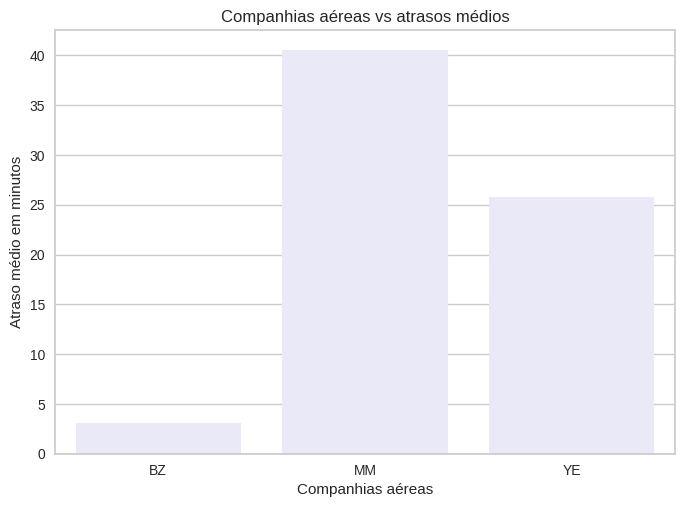

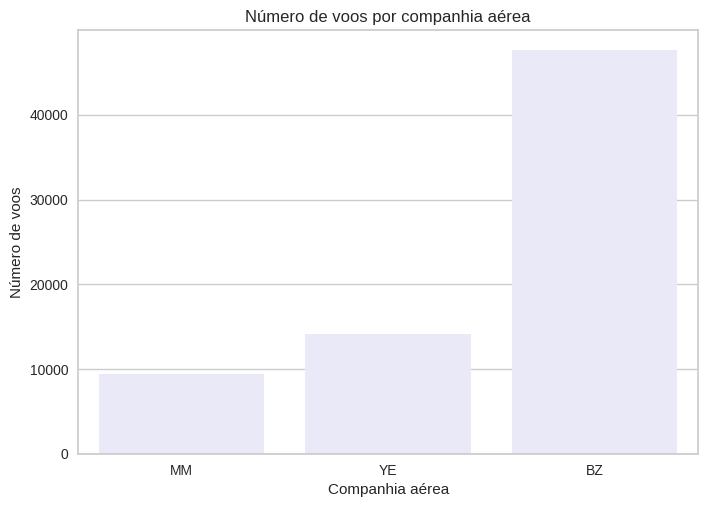

In [9]:
sns.barplot(x='airline', y='delay', data=average_delay, color= "lavender")
plt.title('Companhias aéreas vs atrasos médios')
plt.xlabel('Companhias aéreas')
plt.ylabel('Atraso médio em minutos')
plt.show()

# Gráfico que faz a contagem das companhias áreas:
sns.countplot(data=df, x='airline', color = "lavender")
plt.title('Número de voos por companhia aérea')
plt.xlabel('Companhia aérea')
plt.ylabel('Número de voos')
plt.show()


In [10]:
# Ao criar um novo conjunto de dados agrupados entre airline e delay,
# eu calculo a média de atraso relativos às linhas áreas e passo o reset_index( ),
# pois, caso contrário, ele me retornaria uma Series, sendo que preciso de um
# dataframe.

average_delay_sh = df.groupby('schengen')['delay'].mean().reset_index()
average_delay_sh

,schengen,delay
0,non-schengen,15.350827
1,schengen,10.665156


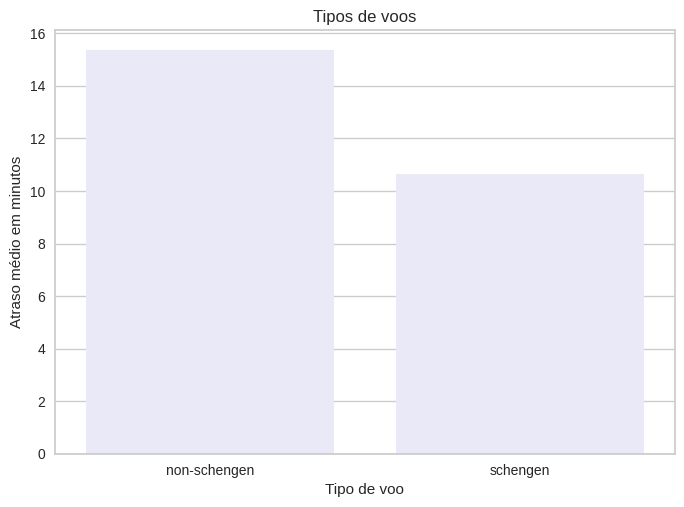

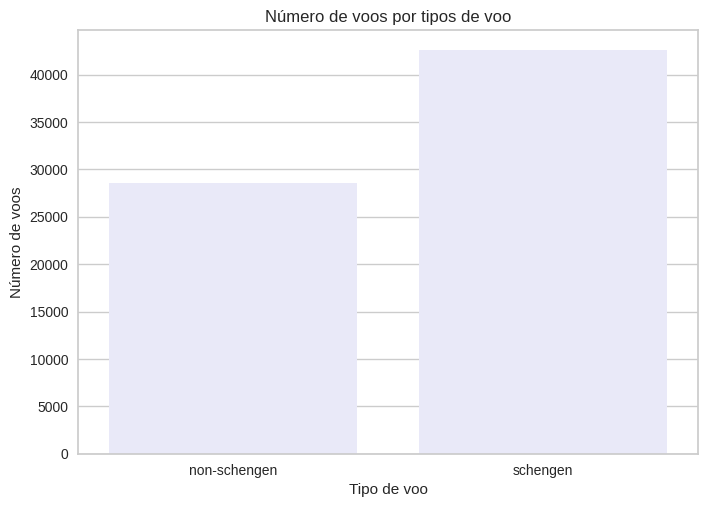

In [11]:
# Verificando quantos vôos passam pelo espaço Schengen:

sns.barplot(x='schengen', y='delay', data=average_delay_sh, color= "lavender")
plt.title('Tipos de voos')
plt.xlabel('Tipo de voo')
plt.ylabel('Atraso médio em minutos')
plt.show()

# Gráfico que faz a contagem das companhias áreas:
sns.countplot(data=df, x='schengen', color = "lavender")
plt.title('Número de voos por tipos de voo')
plt.xlabel('Tipo de voo')
plt.ylabel('Número de voos')
plt.show()


In [12]:
# Ao criar um novo conjunto de dados agrupados entre airline e delay,
# eu calculo a média de atraso relativos às linhas áreas e passo o reset_index( ),
# pois, caso contrário, ele me retornaria uma Series, sendo que preciso de um
# dataframe.

average_delay_holiday = df.groupby('is_holiday')['delay'].mean().reset_index()
average_delay_holiday

,is_holiday,delay
0,False,10.835677
1,True,42.092465


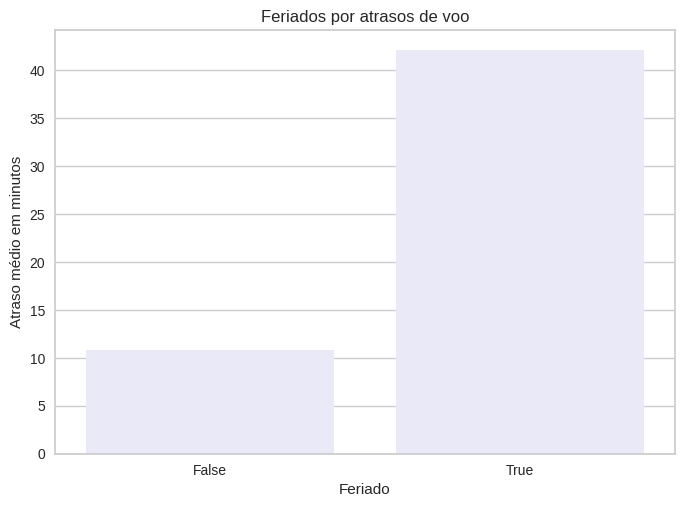

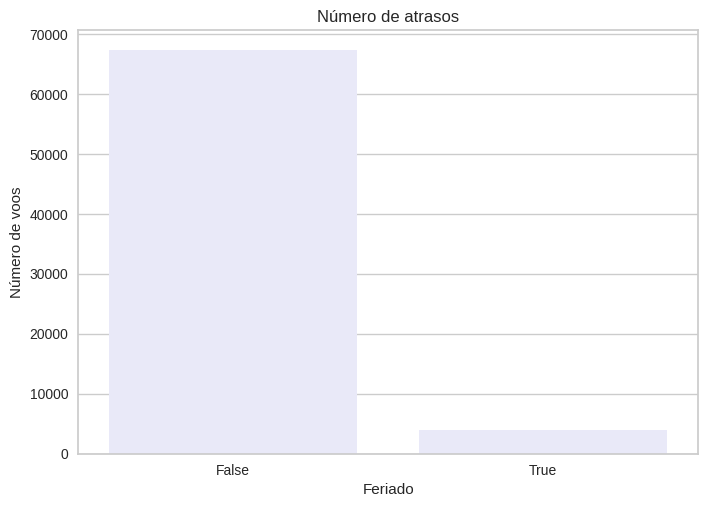

In [13]:
# Verificando quantos vôos passam pelo espaço Schengen:

sns.barplot(x='is_holiday', y='delay', data=average_delay_holiday, color= "lavender")
plt.title('Feriados por atrasos de voo')
plt.xlabel('Feriado')
plt.ylabel('Atraso médio em minutos')
plt.show()

# Gráfico que faz a contagem das companhias áreas:
sns.countplot(data=df, x='is_holiday', color = "lavender")
plt.title('Número de atrasos')
plt.xlabel('Feriado')
plt.ylabel('Número de voos')
plt.show()


In [14]:
# Criando uma ordem para a plotagem do gráfico, de modo que o gráfico
# começa por aquele que apresenta maior quantidade de voos.

order = df['aircraft_type'].value_counts().index
order

Index(['Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175',
       'Boeing 737', 'Boeing 777'],
      dtype='object')

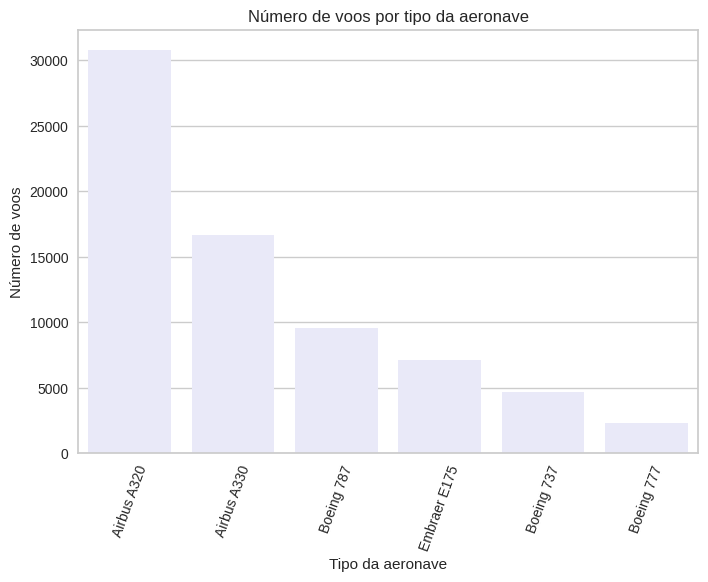

In [15]:
# Criando o gráfico:
sns.countplot(data=df, x='aircraft_type', order = order, color = "lavender")
plt.title('Número de voos por tipo da aeronave')

# Rotacionando as labels presentes no eixo x, para que facilite a visualização:
plt.xticks(rotation=70)

plt.xlabel('Tipo da aeronave')
plt.ylabel('Número de voos')
plt.show()


#Analisando a distribuição dos dados:

In [16]:
import numpy as np

def calcular_largura_bin(df, coluna):

  # Calculando os quartis de 75% e 25% da coluna especificada:
  Q75, Q25 = np.percentile(df[coluna], [75 ,25])

  # Calculando a diferença interquartil, sendo uma medida da
  # dispersão dos dados.
  IQR = Q75 - Q25

  # Aqui, a largura do bin (usada em histogramas) está sendo calculada.
  # A fórmula utilizada inclui o dobro do IQR multiplicado pelo tamanho do
  # DataFrame elevado a -1/3 (o cubo da raiz cúbica do tamanho do DataFrame).
  # Este é um método comum para estimar a largura ideal do bin em um histograma.
  largura_bin = 2 * IQR * np.power(len(df[coluna]), - 1/3)

  return largura_bin

In [17]:
largura_bin_at = calcular_largura_bin(df, "arrival_time")
largura_bin_at

0.3846176245547029

<Axes: xlabel='arrival_time', ylabel='Count'>

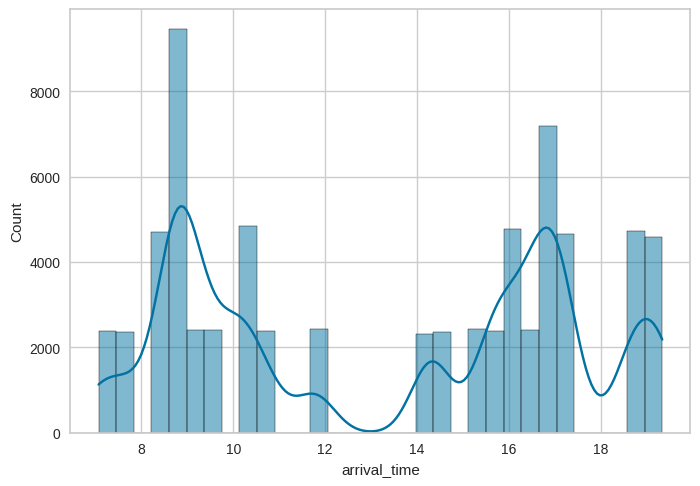

In [18]:
sns.histplot(data=df, x="arrival_time", kde=True,
             binwidth=largura_bin_at)

In [19]:
# Verificando para a saída:

largura_bin_dt = calcular_largura_bin(df, "departure_time")
largura_bin_dt

0.3558030990133985

<Axes: xlabel='departure_time', ylabel='Count'>

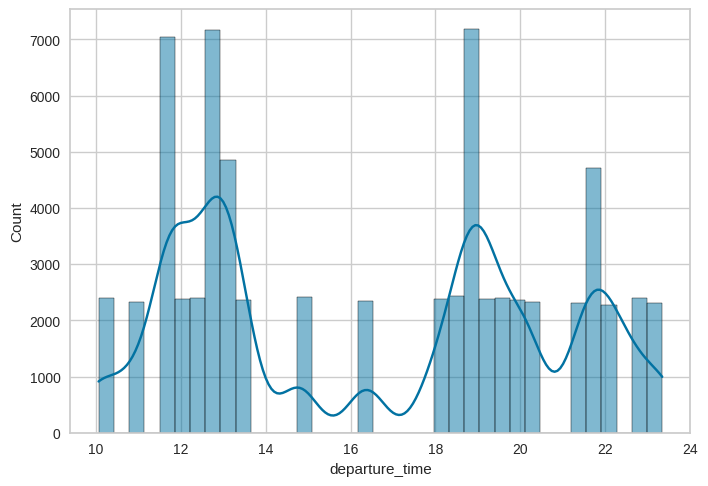

In [20]:
sns.histplot(data=df, x="departure_time", kde=True,
             binwidth=largura_bin_dt)

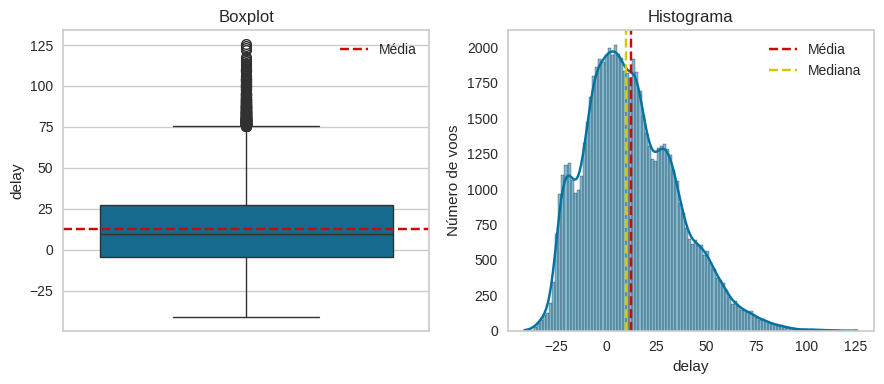

In [21]:
# Visualizando o boxplot e o gráfico da função de distribuição dos dados,
# com base na variável target.

mean_delay = df['delay'].mean()
median_delay = df['delay'].median()

# Criando subplots que estejam numa linha com duas colunas:
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.boxplot(data=df, y='delay', ax=axes[0])
axes[0].set_title('Boxplot')

axes[0].axhline(y=mean_delay, color='r', linestyle='--', label='Média')
axes[0].legend()

largura_bin_delay = calcular_largura_bin(df, 'delay')
sns.histplot(data=df, x='delay', ax=axes[1], kde=True, binwidth=largura_bin_delay)
plt.ylabel('Número de voos')
plt.grid(False)
axes[1].set_title('Histograma')

axes[1].axvline(x=mean_delay, color='r', linestyle='--', label='Média')
axes[1].axvline(x=median_delay, color='y', linestyle='--', label='Mediana')
axes[1].legend()

plt.tight_layout()
plt.show()


- Analisando os gráficos:

O gráfico de boxplot aparenta ter a presença de outiliers, o que vale analisar melhor a sua quantidade, pois se forem muitos, podem dar viés aos modelos de regressão e machine learning, dificultando a análise e prejudicando a predição dos modelos.

O gráfico de dispersão aparenta ser levemente assimétrico à direita, porém tanto a mediana quanto a média estão próximas, o que é um bom índicio, significando que não precisamos fazer maiores tratamentos na variável target.


**Boxplot:**

Vale relembrar que o gráfico boxplot, as suas extremidades verticais indicam a amplitude dos dados, com um limite superior e inferior. Os outliers, nesse sentido, são dados que extrapolam esses limites.

#Preparando os dados

In [22]:
df.head(2)

# Lembrando que day 0 indica o primeiro dia do ano.

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609


In [23]:
# Criar novas colunas que se refiram à data, se é um final de semana e de qual dia:

# Uma forma de criar a coluna data é concatenar o ano com o dia e depois envolvê-los
# numa função datetime. Mas, para tanto, antes precisa transformar tais colunas em
# formato string.

df["year"].astype(str)

# Como por padrão os dias começam com 0, para colocá-los no primeiro dia
# precisei envolver entre parênteses e adicionar, após o item referido, o
# valor de 1.

(df["day"] + 1).astype(str)

# Ambos itens retornariam uma série do tipo Series.

0          1
1          1
2          1
3          1
4          1
        ... 
71170    365
71171    365
71172    365
71173    365
71174    365
Name: day, Length: 71175, dtype: object

In [24]:
df["year"].astype(str) + "-" + (df["day"] + 1).astype(str)


0          2010-1
1          2010-1
2          2010-1
3          2010-1
4          2010-1
           ...   
71170    2022-365
71171    2022-365
71172    2022-365
71173    2022-365
71174    2022-365
Length: 71175, dtype: object

In [25]:
# Transformando o tipo dos dados para datetime:

df["date"] = pd.to_datetime(df["year"].astype(str) + "-" + (df["day"] + 1).
               astype(str), format='%Y-%j')



In [26]:
# Criando uma nova coluna no dataframe, de modo que me informe com valores
# booleanos se o dia é um final de semana, sendo esses aqueles cujo valor
# é 5 ou 6. Eu consigo fazer isso por meio da associação de objetos weekday,
# que me retorna uma Series com os dias da coluna date, e o isin, que significa
# "está em", criando uma condição booleana para os valores que passou.

df["is_weekend"] = df["date"].dt.weekday.isin([5,6])

df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False


In [27]:
# Agora, por fim, criar uma outra coluna que me retorna o nome dos dias:

# A função que me permite acessar o nome dos dias é day_name(), associado
# ao "dt".

df['day_name'] = df['date'].dt.day_name()
df.head()


,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False,Friday
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False,Friday
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False,Friday
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False,Friday
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False,Friday


**Codificando as features para o modelo de machine learning:**

In [28]:
# Verificando os dados únicos do dataframe
df.nunique()

flight_id            30
airline               3
aircraft_type         6
schengen              2
origin               10
arrival_time         30
departure_time       30
day                 365
year                 13
is_holiday            2
delay             71175
date               4745
is_weekend            2
day_name              7
dtype: int64

In [29]:
# Nota-se que que há três itens com valores únicos 2. Podemos
# verificar quais são seus valores da seguinte forma:

df["schengen"].unique()

array(['non-schengen', 'schengen'], dtype=object)

In [30]:
df["is_holiday"].unique()

array([False,  True])

In [31]:
# Nota-se que possuem valores booleanos, então podemos transformá-los
# para numéricos, do tipo 1 e 0.

df['schengen'] = df['schengen'].replace({"non-schengen": 0, "schengen": 1})
df['is_holiday'] = df['is_holiday'].replace({False: 0, True: 1})
df['is_weekend'] = df['is_weekend'].replace({False: 0, True: 1})


In [32]:
# Transformando as variáveis categóricas em dados numéricos por meio do
# get_dummies.

variaveis_categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

# Dataframe codificado pelo dummies:
df_encoded = pd.get_dummies(data = df, columns = variaveis_categoricas, dtype=int)

df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


# Limpando os dados

Durante o processo de tratamento dos dados é importante tirar informação do que encontramos, inclusive se determinados dados são redundantes ou não, visando diminuir a dimensionalidade dos dados, mas por que isso é importante? No primeiro momento, buscar dados relevantes que explicam a resposta e que sejam sintéticos, por assim dizer, se enquadram no conceito de navalha de Occam, bem como diminui a exigência de processamento, além de evitar a realização de uma má análise.

Dentre uma das formas de limpar os dados é verificar o nível de correlação deles, de modo que se o valor for -1, indica que são perfeitamente inversos, enquanto que o oposto, 1, indica que são estritamente proporcionais positivos.


In [33]:
df_encoded[['arrival_time', 'departure_time']].corr()

# Após a criação desse dg, nota-se que ambas as colunas
# são muito semelhantes em relação a outra, praticamente
# explicando a mesma coisa, o que significa que podemos
# "cortar" alguma.





,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [34]:
df_encoded = df_encoded.drop("departure_time", axis = 1)
df_encoded.head()

,flight_id,schengen,arrival_time,day,year,is_holiday,delay,date,is_weekend,airline_BZ,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,0,2010,0,70.205981,2010-01-01,0,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,0,2010,0,38.484609,2010-01-01,0,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,0,2010,0,2.388305,2010-01-01,0,1,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,0,2010,0,19.138491,2010-01-01,0,1,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,0,2010,0,15.016271,2010-01-01,0,1,...,0,0,0,1,0,0,0,0,0,0


In [35]:
# Além da coluna já removida, para a construção do modelo de machine learning
# posso remover também as demais colunas. Tanto o day quanto year e date estão
# sendo excluídas, pois o objetivo do modelo é prever se, pontualmente, o voo
# pode ou não atrasar, e não ao longo do tempo, depois de dois anos e afins.

# Caso contrário, utilizariamos de séries temporais, como forma de prever
# "o futuro."

df_clean = df_encoded.drop(["flight_id", "day", "year", "date"], axis=1)
df_clean.head()


,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0,8.885071,0,70.205981,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,0,8.939996,0,38.484609,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
2,1,18.635384,0,2.388305,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,15.967963,0,19.138491,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,16.571894,0,15.016271,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


# Seleção e validação do modelo:


Para a seleção do modelo e sua validação, precisamos compará-lo com algo. Uma linha de base muito comum de ser adotada, baseline, é justamente o Dummy. Como o modelo criado será um regressor logístico, estarei passando um DummyRegressor.

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor

In [37]:
# Separando os dados em treino e teste:

X = df_clean.drop(["delay"], axis = 1)
y = df_clean["delay"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model_dummy = DummyRegressor()
model_dummy.fit(X_train, y_train)

y_pred_dummy = model_dummy.predict(X_test)

# Verificando a previsão do valor:
y_pred_dummy

# Aqui ele retorna um array, vetor, com a previsão de atraso para
# cada dado de teste, mas o quão bom é o modelo? Para isso, precisa
# de uma aferição, que vem na sequência.

array([12.52857512, 12.52857512, 12.52857512, ..., 12.52857512,
       12.52857512, 12.52857512])

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calcular_metricas_regressao(y_test, y_pred):

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metricas = {
        'Raiz do Erro Quadrático Médio': round(rmse, 4),
        'Erro Absoluto Médio': round(mae, 4),
        'R2 Score': round(r2, 4)
    }

    return metricas

    # Entendendo as métricas passadas:

    # Erro médio quadrático (rmse): dispersão dos erros com base no erro médio
    # Erro médio (mae): o erro médio do modelo
    # r2 : coeficiente de coleção, que indica o quão bem o modelo se ajusta aos
    #      aos dados, de modo que as features explicam, conseguem explicar, a target.


calcular_metricas_regressao(y_test, y_pred_dummy)

{'Raiz do Erro Quadrático Médio': 23.2241,
 'Erro Absoluto Médio': 18.6127,
 'R2 Score': -0.0}

Tanto o rmse quanto o mae o quão menores forem melhor, pois indica o quão distante estão dos valores dos dados reais. Desse modo, um modelo que no rmse dita 23 e no mae 19 minutos, aproximadamente, não apresenta uma boa previsão, indicando que ele não está bem ajustado aos dados.

Note que o meu r2 foi do menos infinito a -0.0001, o que significa que o modelo é, sim, péssimo, o que é esperado, uma vez que se trata de um Dummy. Tal valor significa que o modelo é não está sendo melhor que uma previsão média dos atrasos de voo, ou seja, ele não está bem ajustado aos dados.

- Modelo para criado para a previsão:

In [39]:
# Utilizarei o random forest regressor:

from sklearn.ensemble import RandomForestRegressor

# Iniciando o modelo:
model_rf = RandomForestRegressor()

# Treinando o modelo:
model_rf.fit(X_train, y_train)

# Prevendo os dados com o modelo:
y_pred_rf = model_rf.predict(X_test)

# Calculando as métricas com o novo modelo:
calcular_metricas_regressao(y_test, y_pred_rf)


{'Raiz do Erro Quadrático Médio': 13.2441,
 'Erro Absoluto Médio': 10.6137,
 'R2 Score': 0.6748}

Note que com a prmeira versão desse modelo já melhoramos as métricas.

In [40]:
# Iniciando o modelo com novos parâmetros:

# Adicionando um max_depth, definindo uma profundidade máxima.

model_rf2 = RandomForestRegressor(max_depth=8, random_state=42)

# Treinando o modelo:
model_rf2.fit(X_train, y_train)

# Prevendo os dados com o modelo:
y_pred_rf2 = model_rf2.predict(X_test)

# Calculando as métricas com o novo modelo:
calcular_metricas_regressao(y_test, y_pred_rf2)


{'Raiz do Erro Quadrático Médio': 13.2652,
 'Erro Absoluto Médio': 10.6454,
 'R2 Score': 0.6737}

Ok, temos o valor, porém e se eu quero visualizar graficamente, o que faço? Crio uma forma de visualização da seguinte forma:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


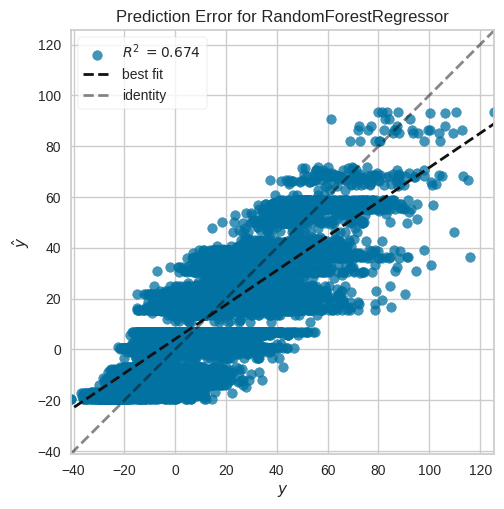

In [41]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(model_rf2, X_train, y_train, X_test, y_test)


Entendendo o gráfico:
A dispersão dos dados, de tal forma que a reta não os acompanha indica que o modelo precisa ser melhorado. Além disso, a reta tracejada identidade indica onde deveria estar a nossa reta.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


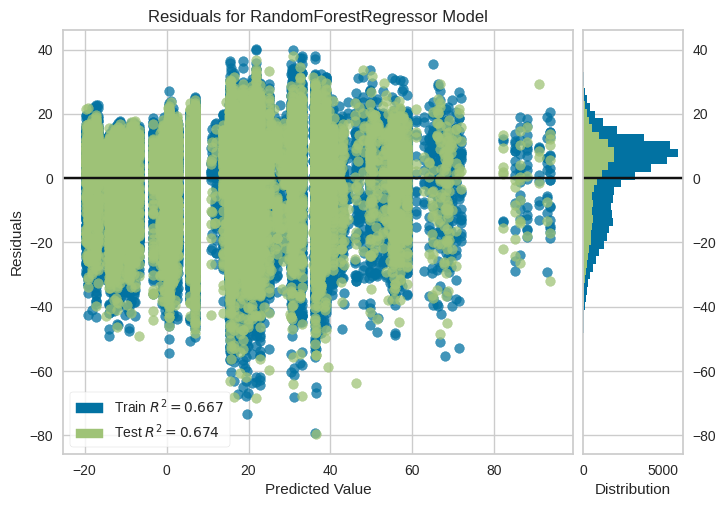

In [42]:
# Verificando os resíduos, ou seja, os erros do modelo:

from yellowbrick.regressor import residuals_plot

# Create the visualizer, fit, score, and show it
viz = residuals_plot(model_rf2, X_train, y_train, X_test, y_test)

Entendendo o gráfico de residuos:

Esse gráfico indica a medida do erro do modelo, a distância entre o valor real e o que fora previsto. Um bom modelo, assim, é aquele que no primeiro gráfico apresenta dados dispersos ao longo do eixo x, enquanto que no segundo é um que assemelha a uma função normal, estando a sua mediana próxima do eixo 0.

**Mitigando casos de overffiting:**

Um modo de mitigar o overfitting, bem como melhorar o modelo é realizar uma validação cruzada, que pode ser ilustrada na imagem a seguir:



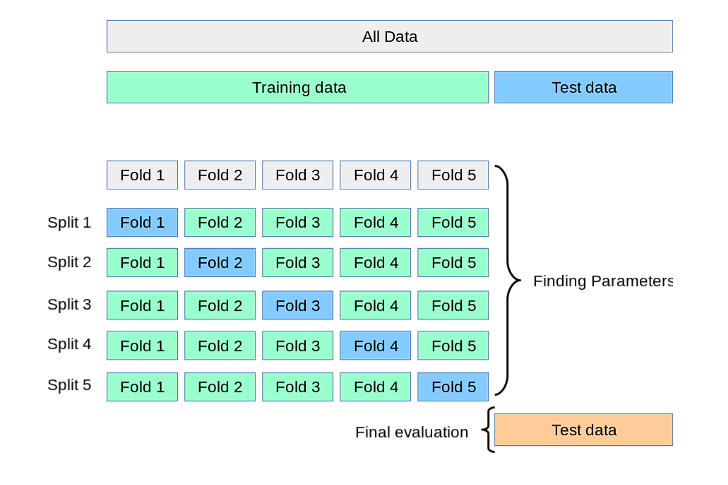

A ideia principal por trás da validação cruzada é realizar múltiplas divisões do conjunto de dados em subconjuntos de treinamento e teste, treinando e avaliando o modelo em cada uma dessas divisões. Isso ajuda a garantir que a avaliação do modelo seja mais representativa e menos dependente da divisão específica dos dados.

Existem várias abordagens para a validação cruzada, sendo a "k-fold cross-validation" uma das mais comuns. Nessa abordagem, o conjunto de dados é dividido em k partes (ou dobras), e o modelo é treinado k vezes, cada vez usando k-1 partes como conjunto de treinamento e a parte restante como conjunto de teste. Isso é repetido k vezes, cada vez com uma dobra diferente como conjunto de teste. Ao final, as métricas de desempenho são geralmente médias para obter uma avaliação global.

Vantagens da validação cruzada incluem:

Redução de Viés na Avaliação: Ao realizar várias divisões, você reduz a chance de obter uma avaliação enviesada devido a uma única divisão particularmente boa ou ruim.

Avaliação Mais Robusta: O desempenho do modelo é avaliado em diferentes conjuntos de dados de teste, proporcionando uma avaliação mais robusta da capacidade do modelo de generalizar para novos dados.

Melhor Utilização dos Dados: Em vez de dividir os dados em apenas um conjunto de treinamento e teste, a validação cruzada permite que todos os dados sejam usados para treinamento e teste em algum momento, maximizando a utilização dos dados disponíveis.

A validação cruzada é uma prática recomendada em ciência de dados, pois ajuda a evitar avaliações enviesadas e fornece uma visão mais realista do desempenho do modelo

In [43]:
# Importa as classes necessárias do scikit-learn para validação cruzada e métricas de desempenho
from sklearn.model_selection import KFold, cross_validate

# Define as métricas de desempenho que serão avaliadas durante a validação cruzada
scoring = {
    'mae': 'neg_mean_absolute_error',       # Mean Absolute Error (Erro Absoluto Médio)
    'rmse': 'neg_root_mean_squared_error',  # Root Mean Squared Error (Erro Quadrático Médio)
    'r2': 'r2'                              # R-squared (Coeficiente de Determinação)
}

# Estou passando o prefixo "neg" na nos primeiros termos, pois
# por padrão a validação cruzada retorna valores positivos e, para
# esse caso, eu busco negativos.

# Cria um objeto KFold para realizar a validação cruzada com 5 dobras (splits)
# shuffle=True significa que os dados serão embaralhados antes de dividir
# random_state é uma semente para garantir a reprodutibilidade dos resultados
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Realiza a validação cruzada utilizando o modelo (model_rf2), os dados de treinamento (X_train e y_train),
# o objeto KFold (cv) e as métricas de desempenho especificadas (scoring)
cv_results = cross_validate(model_rf2, X_train, y_train, cv=cv, scoring=scoring)

# Imprime os resultados da validação cruzada
print(cv_results)


{'fit_time': array([4.65552235, 3.60421586, 3.56811666, 4.58744621, 3.60147285]), 'score_time': array([0.07613397, 0.08020163, 0.07583714, 0.07699537, 0.07895565]), 'test_mae': array([-10.69742064, -10.9161331 , -10.67151024, -10.78049451,
       -10.80780046]), 'test_rmse': array([-13.25353405, -13.55314241, -13.29974507, -13.40359791,
       -13.43661469]), 'test_r2': array([0.67263728, 0.65037665, 0.67028488, 0.6649774 , 0.66020585])}


In [44]:
# Facilitando a visualização:

# Com metrics indo em todos os elementos do dicionário scoring e
# e pegando as suas chaves.
for metric in scoring.keys():

    # Selecionando as pontuações para cada test_metric.
    scores = cv_results[f'test_{metric}']

    # Colocando a pontuação para que em seu total, temos
    # a sua média e desvio padrão.
    mean_score = "{:.3f}".format(scores.mean())
    std_score = "{:.3f}".format(scores.std())

    print(f"(metric.upper()) Scores: {[f' {val:.3f}' for val in scores]}")
    print(f"{metric.upper()} Média: {mean_score}, Std: {std_score}")
    print('----------------------------------------------------------------------------------')


(metric.upper()) Scores: [' -10.697', ' -10.916', ' -10.672', ' -10.780', ' -10.808']
MAE Média: -10.775, Std: 0.087
----------------------------------------------------------------------------------
(metric.upper()) Scores: [' -13.254', ' -13.553', ' -13.300', ' -13.404', ' -13.437']
RMSE Média: -13.389, Std: 0.106
----------------------------------------------------------------------------------
(metric.upper()) Scores: [' 0.673', ' 0.650', ' 0.670', ' 0.665', ' 0.660']
R2 Média: 0.664, Std: 0.008
----------------------------------------------------------------------------------


Analisando esse resultado, nota-se que os dados são dispostos em 5 itens, que se referem a quantidade de divisões realizadas na validação cruzada, trazendo ao fim uma média e desvio padrão de cada métrica.

- Otimização:

Uma outra etapa do processo de criação de um modelo de machine learning, além da sua validação cruzada, é entender quais são as variáveis significativas que conseguem explicar a resposta, a target. Nesse sentido, não precisa-se de todas, mas somente as que são realmente necessáriias, tornado o modelo eficiente - Occam.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


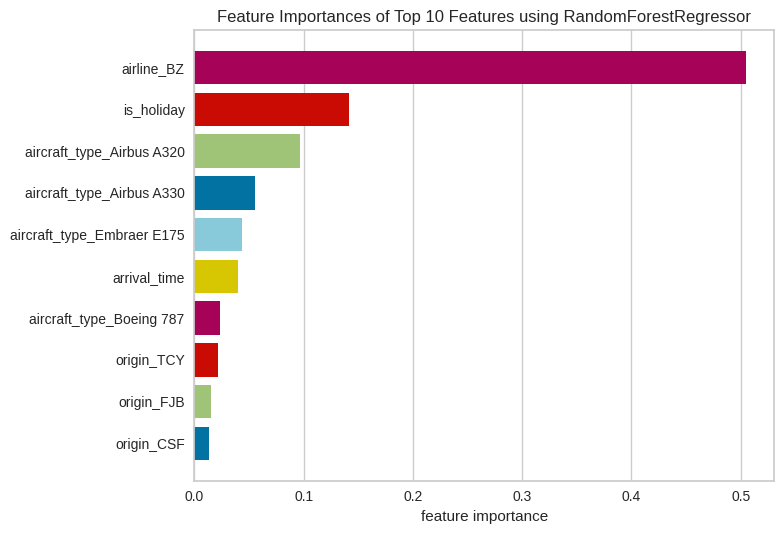

<Axes: title={'center': 'Feature Importances of Top 10 Features using RandomForestRegressor'}, xlabel='feature importance'>

In [45]:
# Verificando a importância das features:

from yellowbrick.model_selection import FeatureImportances

# Quando passo para relative ser igual a falso, estou buscando
# os valores absolutos do universo de dados, pois do contrário
# seriam relativos ao item mais importante, que nesse caso é o
# airline_BZ.

viz = FeatureImportances(model_rf2, relative=False, topn=10)

# topn é o parâmetro utilizado para somente retornar os 10
# primeiros valores.

viz.fit(X_train, y_train)
viz.show()


In [46]:
# Ver a importância de modo numérico:

importances = model_rf2.feature_importances_

feature_importances = pd.DataFrame({'features': X.columns, 'importances': importances})
feature_importances.sort_values('importances', ascending = False).head(10)

,features,importances
4,airline_BZ,0.505188
2,is_holiday,0.141284
7,aircraft_type_Airbus A320,0.096721
8,aircraft_type_Airbus A330,0.055682
12,aircraft_type_Embraer E175,0.043633
1,arrival_time,0.040015
11,aircraft_type_Boeing 787,0.023186
20,origin_TCY,0.021916
17,origin_FJB,0.015581
15,origin_CSF,0.013806


In [47]:
# Criando um DataFrame para armazenar as métricas de avaliação (RMSE, MAE, R2)
results_df = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])

# Configurando o modelo RandomForestRegressor com profundidade máxima de 5 e estado aleatório fixo
model_selected_features = RandomForestRegressor(random_state=42, max_depth=5)

# Loop sobre diferentes contagens de variáveis selecionadas, ou seja, selecionando
# a primeira feature mais importante, as quinta, a décima e assim por diante.
for count in [1, 5, 10, 15, 20, 25, 30]:

    # Selecionando as 'count' variáveis mais importantes com base nas importâncias calculadas anteriormente
    selected_features = feature_importances['features'].values[:count]

    # Filtrando os conjuntos de treinamento e teste para incluir apenas as variáveis selecionadas
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Treinando o modelo com as variáveis selecionadas
    model_selected_features.fit(X_train_selected, y_train)

    # Fazendo previsões no conjunto de teste
    y_pred = model_selected_features.predict(X_test_selected)

    # Calculando métricas de avaliação (RMSE, MAE, R2) usando alguma função específica
    metricas = calcular_metricas_regressao(y_test, y_pred)

    # Armazenando as métricas no DataFrame results_df
    results_df[count] = list(metricas.values())

# Exibindo o DataFrame final com as métricas para diferentes contagens de variáveis selecionadas
results_df


,1,5,10,15,20,25,30
RMSE,23.0970,14.9389,14.3002,13.7406,13.7387,13.7284,13.7301
MAE,18.5637,12.0211,11.4904,11.0253,11.0242,11.0127,11.0138
R2,0.0109,0.5862,0.6208,0.6499,0.6500,0.6506,0.6505


Nesse dataframe observa-se diferentes valores para cada métrica com base nas features mais importantes. É possível observar que após a 15° feature a alteração dos valores é aproximadamente nula, de modo que a alteração é mais perceptível do intervalo entre 10 e 15, o que significa que o limiar das features mais efetivas ao modelo pode estar ai.

In [48]:
# Criando um DataFrame para armazenar as métricas de avaliação (RMSE, MAE, R2)
results_df = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])

# Configurando o modelo RandomForestRegressor com profundidade máxima de 5 e estado aleatório fixo
model_selected_features = RandomForestRegressor(random_state=42, max_depth=5)

# Loop sobre diferentes contagens de variáveis selecionadas, ou seja, selecionando
# a primeira feature mais importante, as quinta, a décima e assim por diante.
for count in range(10,16):

    # Selecionando as 'count' variáveis mais importantes com base nas importâncias calculadas anteriormente
    selected_features = feature_importances['features'].values[:count]

    # Filtrando os conjuntos de treinamento e teste para incluir apenas as variáveis selecionadas
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Treinando o modelo com as variáveis selecionadas
    model_selected_features.fit(X_train_selected, y_train)

    # Fazendo previsões no conjunto de teste
    y_pred = model_selected_features.predict(X_test_selected)

    # Calculando métricas de avaliação (RMSE, MAE, R2) usando alguma função específica
    metricas = calcular_metricas_regressao(y_test, y_pred)

    # Armazenando as métricas no DataFrame results_df
    results_df[count] = list(metricas.values())

# Exibindo o DataFrame final com as métricas para diferentes contagens de variáveis selecionadas
results_df


,10,11,12,13,14,15
RMSE,14.3002,14.3002,14.3939,13.7410,13.7410,13.7406
MAE,11.4904,11.4904,11.4096,11.0256,11.0254,11.0253
R2,0.6208,0.6208,0.6159,0.6499,0.6499,0.6499


Analisando sob o intervalo 10-15 features, nota-se que o valor de limiar seria algo entorno de 12 e 13, porém o utilizado será o 13.

In [49]:
# Verificando as 13 features mais importantes:

selected_features = feature_importances['features'].values[:13]
selected_features

array(['schengen', 'arrival_time', 'is_holiday', 'is_weekend',
       'airline_BZ', 'airline_MM', 'airline_YE',
       'aircraft_type_Airbus A320', 'aircraft_type_Airbus A330',
       'aircraft_type_Boeing 737', 'aircraft_type_Boeing 777',
       'aircraft_type_Boeing 787', 'aircraft_type_Embraer E175'],
      dtype=object)

In [50]:
# Armazenando as features mais importantes no segmento das variáveis explicativas:

X_selected_features = X[selected_features]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_features,
                                                    y, random_state=42)

In [52]:
# Parâmetros ao grid:

# Uma boa forma de mensurar a exigência computacional do GridSearch
# é saber quantas vezes ele irá treinar e, para isso, basta fazer uma
# análise combinatória. Como são 3 itens passados em cada parâmetro, sendo
# esses 4, então o nível de combinação entre elas será de 3*3*3*3 = 81.

# Como estou passando uma divisão de 5 para a validação cruzada, o número
# de treinamento e teste fica: 81*5 = 405.

param_grid = {
'max_depth': [5, 10, 15],
'min_samples_leaf': [1, 2, 3],
'min_samples_split': [2, 4, 6],
'n_estimators': [100, 150, 200]
}


In [53]:
# Comando que mede o tempo de execução da célula:
%%time

from sklearn.model_selection import GridSearchCV

GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid,
             scoring='r2', cv=None, verbose=0, pre_dispatch='2*n_jobs',
             error_score=np.nan, return_train_score=False)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

model_grid = GridSearchCV(RandomForestRegressor(random_state=42),
                          param_grid=param_grid, scoring='r2', cv=cv)

model_grid.fit(X_train, y_train)



CPU times: user 17min 33s, sys: 1.6 s, total: 17min 35s
Wall time: 17min 40s


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [54]:
y_pred_model_grid = model_grid.predict(X_test)

metricas_model_grid = calcular_metricas_regressao(y_test, y_pred_model_grid)
metricas_model_grid


{'Raiz do Erro Quadrático Médio': 13.2635,
 'Erro Absoluto Médio': 10.6731,
 'R2 Score': 0.6738}

In [55]:
results_df['model_grid'] = list(metricas_model_grid.values())
results_df


,10,11,12,13,14,15,model_grid
RMSE,14.3002,14.3002,14.3939,13.7410,13.7410,13.7406,13.2635
MAE,11.4904,11.4904,11.4096,11.0256,11.0254,11.0253,10.6731
R2,0.6208,0.6208,0.6159,0.6499,0.6499,0.6499,0.6738


In [56]:
# Salvando o modelo criado:

try:
    with open('model_producao.pkl', 'wb') as file:
        pickle.dump(model_grid.best_estimator_, file)
    print('Modelo salvo com sucesso!!!')
except Exception as e:
    print ('Ocorreu um erro ao salvar o modelo: ', str(e))


Ocorreu um erro ao salvar o modelo:  name 'pickle' is not defined
